# ConvNextTiny

In [1]:
import os
import wandb
from dotenv import load_dotenv

# load variables from env
load_dotenv()

# Start weights and biases
wandb.login()


wandb: [wandb.login()] Loaded credentials for https://api.wandb.ai from WANDB_API_KEY.
wandb: Currently logged in as: coffeedrunk to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [2]:
import tensorflow as tf

# Enable memory growth
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"✅ Enabled memory growth for {len(gpus)} GPU(s)")
    except RuntimeError as e:
        print(e)

# Prevent Out Of Memory
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

2026-02-20 14:52:52.336609: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-20 14:52:52.363018: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-02-20 14:52:52.363040: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-02-20 14:52:52.363061: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2026-02-20 14:52:52.368333: I tensorflow/core/platform/cpu_feature_g

✅ Enabled memory growth for 1 GPU(s)


2026-02-20 14:52:53.317076: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2026-02-20 14:52:53.323215: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2026-02-20 14:52:53.325065: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
# Read the dataset
from utils.data import load_data

X_train, y_train, X_test, y_test, labels = load_data()
n_labels = len(labels)

2026-02-20 14:52:53.395204: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2026-02-20 14:52:53.397152: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2026-02-20 14:52:53.398898: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## Transfer Learning

Freezing the base model layers and training the top layers.

### Setting the configurations

In [ ]:
from utils.config import WandbConfig, ExperimentConfig

config = ExperimentConfig(input_shape=(224,224,3),
                          epochs=1,
                          batch_size=124,
                          model_name="ConvNeXtTiny",
                          normalize=False,
                          augment=False)

experiment_name = f"{config.model_name}_{config.input_shape[0]}_{config.batch_size}"

wandb_config = WandbConfig(project_name="deep-learning-cifar10-classification_final",
                           experiment_name=experiment_name)


### Run Experiment with configurations

In [ ]:
from utils.train import run_experiment

(train_ds,
 val_ds,
 test_ds,
 model,
 history,
 run) = run_experiment(X_train, y_train,
               X_test, y_test,
               wandb_config=wandb_config,
               config=config,
               class_names = labels)


### Evaluation

In [ ]:
import numpy as np
from utils.eval import get_metrics_report, plot_confusion_matrix

# Predictions
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
report = get_metrics_report(y_test, y_pred, labels)
plot_confusion_matrix(y_test, y_pred, labels)

## With augmentation

### Set configurations

In [4]:
from utils.config import WandbConfig, ExperimentConfig

config = ExperimentConfig(input_shape=(224,224,3),
                          epochs=2,
                          batch_size=124,
                          model_name="ConvNeXtTiny",
                          normalize=False,
                          augment=True)

experiment_name = f"{config.model_name}_{config.input_shape[0]}_{config.batch_size}_augment_test"

wandb_config = WandbConfig(project_name="deep-learning-cifar10-classification_final",
                           experiment_name=experiment_name)


### Run Experiment

In [6]:
from utils.train import run_experiment

(train_ds,
 val_ds,
 test_ds,
 model,
 history,
 run) = run_experiment(X_train, y_train,
               X_test, y_test,
               wandb_config=wandb_config,
               config=config,
               class_names = labels)



/usr/local/lib/python3.10/dist-packages/pydantic/main.py:308: UserWarning: Pydantic serializer warnings:
  Expected `list[str]` but got `tuple` - serialized value may not be as expected
  Expected `list[str]` but got `tuple` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


Epoch 1/2


2026-02-20 14:53:09.068747: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2026-02-20 14:53:09.140949: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2026-02-20 14:53:09.140982: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2026-02-20 14:53:09.141331: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2026-02-20 14:53:09.141356: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2026-02-20

323/323 [==============================] - 185s 365ms/step - loss: 0.4577 - accuracy: 0.8555 - val_loss: 0.2505 - val_accuracy: 0.9172
Epoch 2/2
4/4 [==============================] - 6s 857ms/step


epoch/accuracy,▁█
epoch/epoch,▁█
epoch/learning_rate,▁▁
epoch/loss,█▁
epoch/val_accuracy,▁█
epoch/val_loss,█▁
final_val_accuracy,▁
final_val_loss,▁
epoch/accuracy,0.90307
epoch/epoch,1
epoch/learning_rate,0.001


### Evaluation

81/81 [==============================] - 22s 268ms/step
              precision    recall  f1-score   support

    airplane       0.94      0.91      0.92      1000
  automobile       0.96      0.94      0.95      1000
        bird       0.90      0.91      0.90      1000
         cat       0.89      0.77      0.82      1000
        deer       0.90      0.91      0.90      1000
         dog       0.86      0.91      0.88      1000
        frog       0.90      0.96      0.93      1000
       horse       0.95      0.94      0.94      1000
        ship       0.93      0.97      0.95      1000
       truck       0.93      0.95      0.94      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



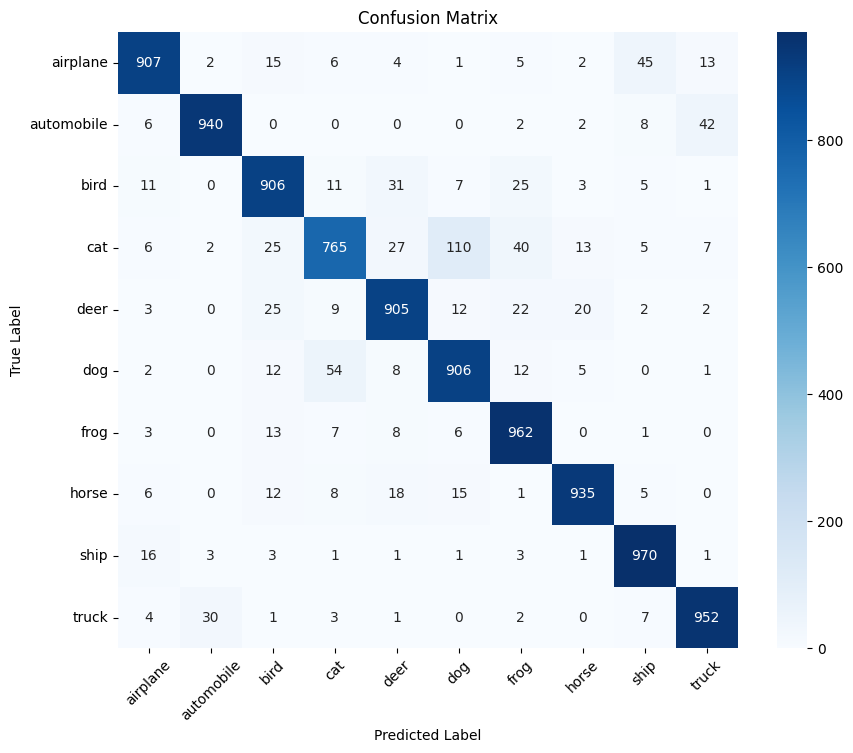

In [7]:
import numpy as np
from utils.eval import get_metrics_report, plot_confusion_matrix

# Predictions
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)
report = get_metrics_report(y_test, y_pred, labels)
plot_confusion_matrix(y_test, y_pred, labels)

In [8]:
from utils.eval import plot_predictions, plot_wrong_predictions

4/4 [==============================] - 0s 78ms/step


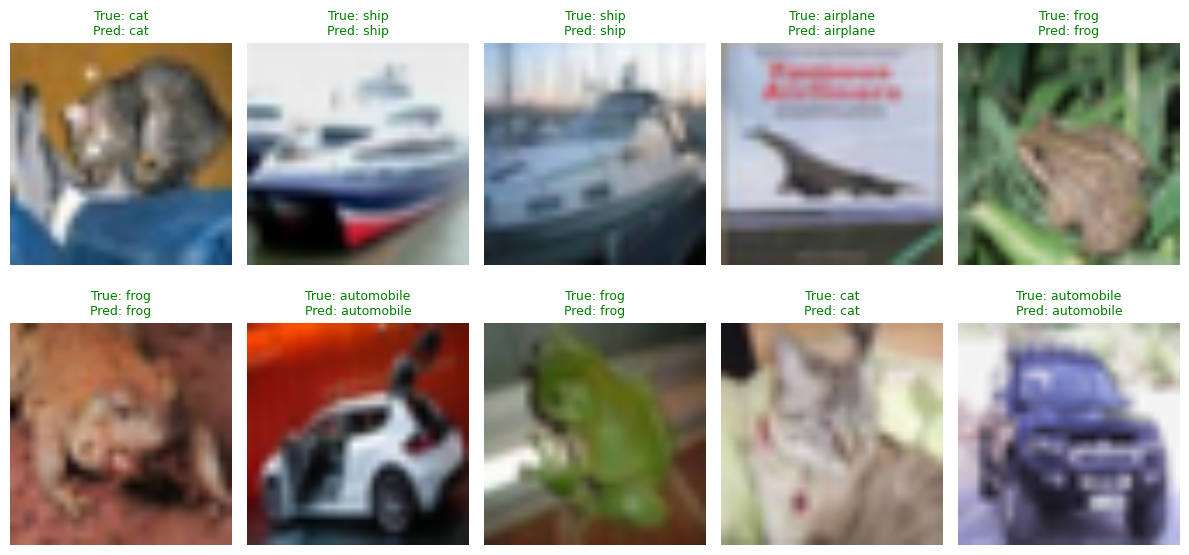

In [9]:
plot_predictions(model, test_ds, labels)

4/4 [==============================] - 0s 64ms/step


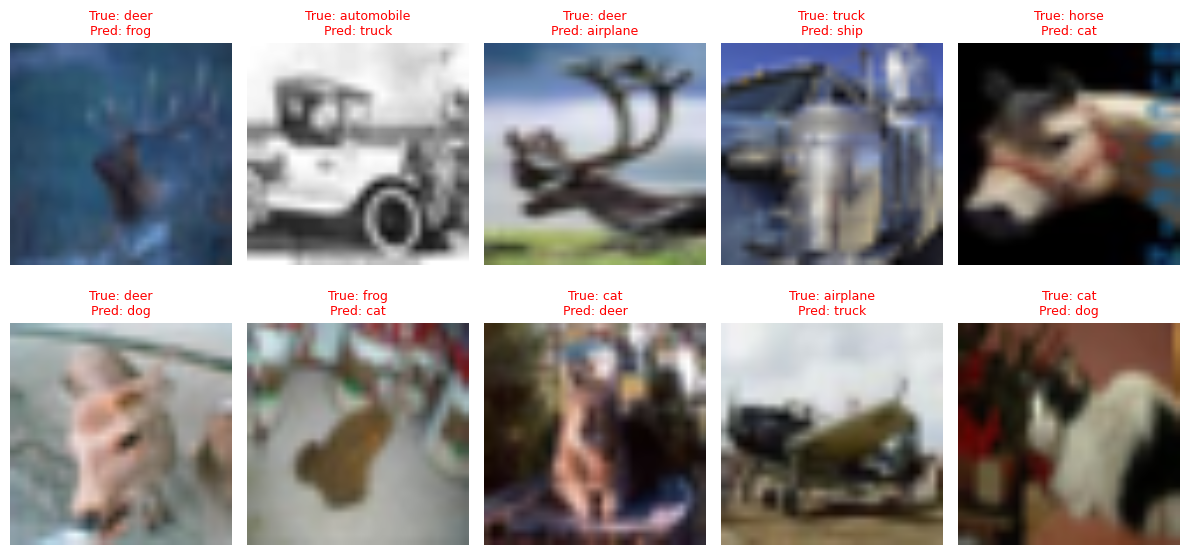

In [10]:
plot_wrong_predictions(model, test_ds, labels)